# Статистический анализ данных

Сервис аренды самокатов GoFast передал данные о некоторых пользователях из разных городов, а также об их поездках. В ходе исследования изучим данные, проанализируем их и проверим некоторые гипотезы, которые помогут бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Загрузка данных

Загрузим данные и проверим типы данных.

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


В таблице users с типами данных всё в порядке.

In [4]:
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


В таблице rides необходимо изменить тип данных в столбце date.

In [5]:
subscriptions.info()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В таблице subscriptions с типами данных всё в порядке.

Ознакомились с данными и выявили проблемы с типами данных. Переходим к предобработке.

## Предобработка данных

Для начала приведем столбец date в таблице rides к типу даты.

In [6]:
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Проверим минимальную и максимальную дату.

In [7]:
print('Минимальная дата:', rides['date'].min())
print('Максимальная дата:', rides['date'].max())

Минимальная дата: 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


У нас есть данные с 1 января 2021 года по 30 декабря 2021 года.

Теперь добавим столбец с номером месяца. 

In [8]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим пропуски и дубликаты во всех таблицах.

In [9]:
users.duplicated().sum()

31

In [10]:
users['user_id'].duplicated().sum()

31

В таблице users 31 полный дубликат и 31 повторяющихся значений в user_id, что значит что дубликатов всего 31. Удалим их.

In [11]:
users = users.drop_duplicates()
users.duplicated().sum()

0

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [13]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

В таблице users было 31 дубликат и 0 пропусков, переходим к таблице rides.

In [14]:
rides.duplicated().sum()

0

In [15]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


В таблице rides нет ни дубликатов, ни пропусков. Переходим к таблице subscriptions.

In [16]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В таблице subscriptions нет ни пропусков, ни дубликатов.

Данные во всех таблицах готовы к работе.

## Исследовательский анализ данных

Посмотрим распределение пользователей по городам.

In [17]:
users_city = users['city'].value_counts().reset_index()
users_city['% of total'] = round(users_city['city'] / users_city['city'].sum() * 100, 2)
users_city

,index,city,% of total
0,Пятигорск,219,14.28
1,Екатеринбург,204,13.30
2,Ростов-на-Дону,198,12.91
3,Краснодар,193,12.58
4,Сочи,189,12.32
5,Омск,183,11.93
6,Тюмень,180,11.73
7,Москва,168,10.95


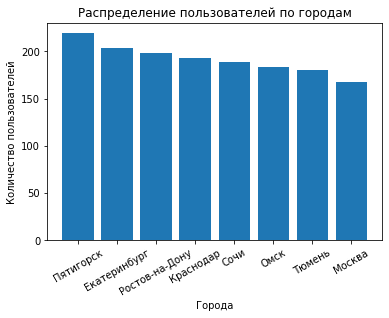

In [18]:
plt.bar(users_city['index'], users_city['city'])
plt.title('Распределение пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=30)
plt.show()

Во всех городах примерно одинаково пользователей. Больше всего пользователей в Пятигорске.

Теперь сравним количество пользователей с подпиской и без неё.

In [19]:
users_sub = users['subscription_type'].value_counts().reset_index()
users_sub['% of total'] = round(users_sub['subscription_type'] / users_sub['subscription_type'].sum() * 100, 2)
users_sub

,index,subscription_type,% of total
0,free,835,54.43
1,ultra,699,45.57


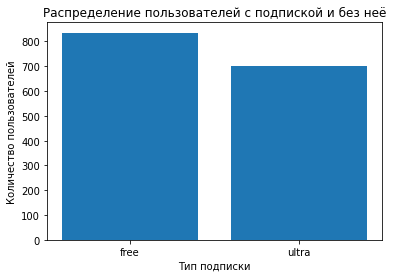

In [20]:
plt.bar(users_sub['index'], users_sub['subscription_type'])
plt.title('Распределение пользователей с подпиской и без неё')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.show()

Пользователей без подписки немного больше, чем пользователей с подпиской.

Теперь посмотрим распределение возрастов пользователей.

In [21]:
print('Минимальный возраст - ', users['age'].sort_values().head(1))
print('Максимальный возраст -', users['age'].sort_values().tail(1))

Минимальный возраст -  664    12
Name: age, dtype: int64
Максимальный возраст - 1201    43
Name: age, dtype: int64


В датафрейме встречаются пользователи от 12 до 43 лет.

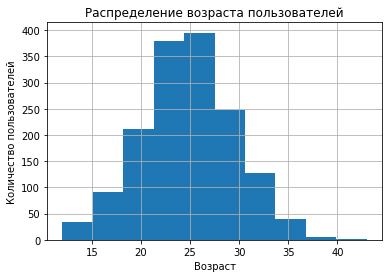

In [22]:
users['age'].hist(bins=10)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Больше всего пользователей с возрастом 21 - 27 год.

Найдем среднее расстояние поездки.

In [23]:
round(rides['distance'].median(),1)

3133.6

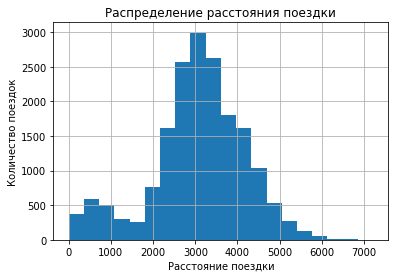

In [24]:
rides['distance'].hist(bins=20)
plt.title('Распределение расстояния поездки')
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество поездок')
plt.show()

Больше всего поездок с длиной 2.5 - 3.5 км. Среднее расстояние поездки 3 км 133.6 метра.

Найдем среднюю продолжительность поездки.

In [25]:
round(rides['duration'].median(), 1)

17.7

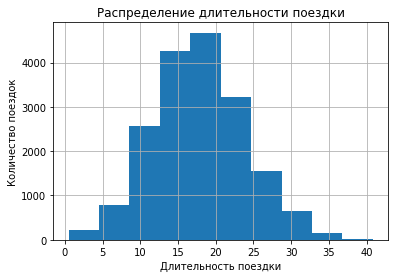

In [26]:
rides['duration'].hist()
plt.title('Распределение длительности поездки')
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.show()

Больше всего поездок с продолжительностью поездки от 13 до 21 минуты. Средняя продолжительность поездки 17.7 минут.

Типичная поездка - пользователь возрастом от 21 до 27 лет проезжает 2.5 - 3.5 км за 13 - 21 минуту.

## Объединение данных

Объединим датафреймы.

In [27]:
data = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Создадим еще два датафрейма. В одном будут лежать все данные о пользователях с подпиской, в другом - без подписки.

In [28]:
data_sub = data[data['subscription_type'] == 'ultra']
data_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [29]:
data_no_sub = data[data['subscription_type'] == 'free']
data_no_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Посмотрим на рапределение расстояния и времени поездок этих двух групп.

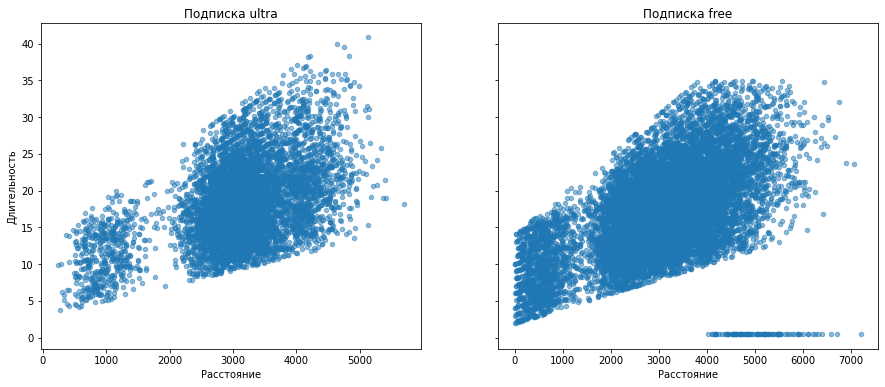

In [30]:
plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)
data_sub.plot('distance', 'duration', kind='scatter', alpha=0.5, ax=ax1)
plt.title('Подписка ultra')
plt.xlabel('Расстояние')
plt.ylabel('Длительность')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
data_no_sub.plot('distance', 'duration', kind='scatter', alpha=0.5, ax=ax2)
plt.title('Подписка free')
plt.xlabel('Расстояние')
plt.ylabel('Длительность')

plt.show()

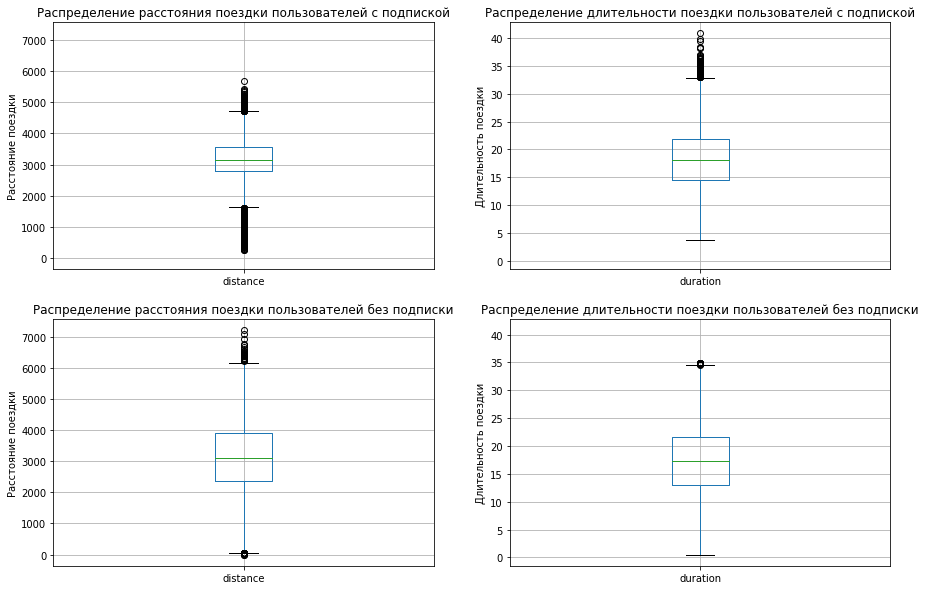

In [31]:
plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 2, 1)
data_sub.boxplot('distance', ax=ax1)
plt.title('Распределение расстояния поездки пользователей с подпиской')
plt.xlabel('')
plt.ylabel('Расстояние поездки')

ax2 = plt.subplot(2, 2, 2)
data_sub.boxplot('duration', ax=ax2)
plt.title('Распределение длительности поездки пользователей с подпиской')
plt.xlabel('')
plt.ylabel('Длительность поездки')

ax3 = plt.subplot(2, 2, 3, sharey=ax1)
data_no_sub.boxplot('distance', ax=ax3)
plt.title('Распределение расстояния поездки пользователей без подписки')
plt.xlabel('')
plt.ylabel('Расстояние поездки')

ax4 = plt.subplot(2, 2, 4, sharey=ax2)
data_no_sub.boxplot('duration', ax=ax4)
plt.title('Распределение длительности поездки пользователей без подписки')
plt.xlabel('')
plt.ylabel('Длительность поездки')

plt.show()

Распределение поездок по продолжительности и дистанции по типу подписки в целом схожи. У пользователей с бесплатной подпиской встречаются большие расстояния при этом время поезки увеличивается не сильно или не увеличивается. Также у пользователей с бесплатной подпиской встречаются поездки с достаточно большой дистанцией, но длительностью близкой к нулю, посмотрим на них.

In [32]:
data_no_sub[data_no_sub['duration'] < 1].sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
12028,1104,Ольга,24,Краснодар,free,4807.103751,0.5,2021-01-06,1,8,50,0
7364,760,Иван,22,Ростов-на-Дону,free,4881.391865,0.5,2021-08-29,8,8,50,0
15112,1324,Давид,21,Ростов-на-Дону,free,5537.095264,0.5,2021-09-16,9,8,50,0
7612,780,Семен,13,Тюмень,free,6112.644835,0.5,2021-11-23,11,8,50,0
17242,1477,Ян,17,Сочи,free,6724.932981,0.5,2021-01-12,1,8,50,0


Такие поездки встречаются в разных городах, у разных пользователей. Невозможно проехать за 30 секунд 4-7 км, скорей всего единица измерения здесь часы, а не минуты. Исправим.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


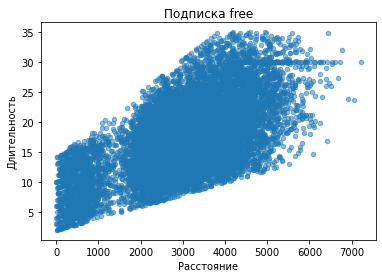

In [33]:
data_no_sub.loc[data_no_sub['duration'] < 1, 'duration'] = (
    data_no_sub.loc[data_no_sub['duration'] < 1, 'duration'] * 60)
#Также исправим в объединенном датафрейме
data.loc[data['duration'] < 1, 'duration'] = (data.loc[data['duration'] < 1, 'duration'] * 60)
data_no_sub.plot('distance', 'duration', kind='scatter', alpha=0.5)
plt.title('Подписка free')
plt.xlabel('Расстояние')
plt.ylabel('Длительность')
plt.show()

Теперь такие поездки выглядят более реально.

Мы объединили данные о пользователях, поездках и подписках в один датафрейм, создали еще два датафрейма с данными о пользователях с подпиской и без неё, выяснили, что продолжительность и длина поездок пользователей с подпиской и без неё в целом схожи и, что у пользователей с бесплатной подпиской встречаются большие расстояния при этом время поезки увеличивается не сильно или не увеличивается.

## Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединенными данными. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за месяц.

In [34]:
df = data.groupby(['user_id','month'])['distance'].sum().reset_index()
user_month_trips = data.groupby(['user_id','month'])['name'].count().reset_index()
user_month_duration = data.groupby(['user_id','month'])['duration'].sum().reset_index()
df = df.merge(user_month_trips, on=['user_id', 'month'])
df = df.merge(user_month_duration, on=['user_id', 'month'])
df.columns = ['user_id', 'month', 'sum_distance', 'trips', 'sum_duration']
df.head()

,user_id,month,sum_distance,trips,sum_duration
0,1,1,7027.511294,2,41.416640
1,1,4,754.159807,1,6.232113
2,1,8,6723.470560,2,44.776802
3,1,10,5809.911100,2,31.578017
4,1,11,7003.499363,3,53.397424


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 0 to 11330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       11331 non-null  int64  
 1   month         11331 non-null  int64  
 2   sum_distance  11331 non-null  float64
 3   trips         11331 non-null  int64  
 4   sum_duration  11331 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 531.1 KB


Пропусков в данных нет. Теперь добавим в датафрейм остальные столбцы.

In [36]:
df = df.merge(data[['user_id', 'month', 'name', 'age', 'city', 'subscription_type', 'minute_price',
                    'start_ride_price', 'subscription_fee']],on=['user_id', 'month'], how='left')
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,user_id,month,sum_distance,trips,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,41.416640,Кира,22,Тюмень,ultra,6,0,199
1,1,4,754.159807,1,6.232113,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6723.470560,2,44.776802,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5809.911100,2,31.578017,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7003.499363,3,53.397424,Кира,22,Тюмень,ultra,6,0,199


Теперь добавим в датафрейм столбец с помесячной выручкой, которую принес каждый пользователь. Для начала округлим вверх продолжительность поездок.

In [37]:
df['sum_duration'] = np.ceil(df['sum_duration']).astype('int')
df.head()

,user_id,month,sum_distance,trips,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,754.159807,1,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6723.470560,2,45,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5809.911100,2,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7003.499363,3,54,Кира,22,Тюмень,ultra,6,0,199


In [38]:
df['revenue'] = df['trips'] * df['start_ride_price'] + df['minute_price'] * df['sum_duration'] + df['subscription_fee']
df.head()

,user_id,month,sum_distance,trips,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,2,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,754.159807,1,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,6723.470560,2,45,Кира,22,Тюмень,ultra,6,0,199,469
3,1,10,5809.911100,2,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,7003.499363,3,54,Кира,22,Тюмень,ultra,6,0,199,523


Мы создали датафрейм в котором посчитали суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, добавили в датафрейм столбец с выручкой для каждого пользователя за месяц.

## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

Проверим тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Для начала посчитаем среднее время поездок пользователей с подпиской и без неё.

In [39]:
df.pivot_table(index='subscription_type', values='sum_duration', aggfunc='mean')

,sum_duration
subscription_type,
free,30.504266
ultra,27.080300


В среднем в этой выборке у пользователей без подписки длина поездок на 3 минуты дольше, чем у пользователей с подпиской. Проведем t-тест.

Возьмем за нулевую гипотезу равенство времени на поездки пользователей с подпиской и без нее, а за альтернативную, что время поездок пользователей с подпиской меньше чем пользователей без подписки.

In [40]:
alpha = 0.025
results = st.ttest_ind(df[df['subscription_type'] == 'ultra']['sum_duration'],
                       df[df['subscription_type'] == 'free']['sum_duration'], alternative='less')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 9.512146845550163e-28
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу. Это значит, что время на поездки пользователей с подпиской меньше, чем без нее.

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?.

Возьмем за нулевую гипотезу, что средняя длина поездки пользователей с подпиской равна 3130, а за альтернативную, что больше, тогда, если мы не отвегаем нулевую гипотезу, то можно сказать, что среднее расстояние не превышает 3130 метров.

In [41]:
print('Средняя длина поездки пользователей с подпиской в выборке:',
      round(data[data['subscription_type'] == 'ultra']['distance'].mean(),1))

Средняя длина поездки пользователей с подпиской в выборке: 3115.4


In [42]:
value = 3130
alpha = 0.025
results = st.ttest_1samp(data[data['subscription_type'] == 'ultra']['distance'], value, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Мы не отвергли нулевую гипотезу. Это значит, что среднее расстояние поездок пользователей с подпиской не превышает 3130 метров.

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Возьмем за нулевую гипотезу равенство выручки с пользователей с подпиской и без нее, а за альтернативную, что пользователи с подпиской приносят больше выручки.

In [43]:
print('Выручка с пользователей без подписки в выборке:', round(df[df['subscription_type'] == 'free']['revenue'].mean(), 1))
print('Выручка с пользователей с подпиской в выборке:', round(df[df['subscription_type'] == 'ultra']['revenue'].mean(), 1))

Выручка с пользователей без подписки в выборке: 329.1
Выручка с пользователей с подпиской в выборке: 361.5


In [44]:
alpha = 0.025
results = st.ttest_ind(df[df['subscription_type'] == 'ultra']['revenue'],
                       df[df['subscription_type'] == 'free']['revenue'], alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 3.959332867057917e-29
Отвергаем нулевую гипотезу


Мы отвегли нулевую гипотезу в пользу альтернативной. Это значит, что пользователи с подпиской приносят большую помесячную выручку

Результаты проверки гипотез:
- Время на поездки пользователей с подпиской меньше, чем без нее.
- Среднее расстояние поездок пользователей с подпиской не превышает 3130 метров.
- Пользователи с подпиской приносят большую помесячную выручку.

## Выводы

- Пользователей без подписки немного больше, чем пользователей с подпиской.
- Типичная поездка - пользователь возрастом от 21 до 27 лет проезжает 2.5 - 3.5 км за 13 - 21 минуту.
- Продолжительность и длина поездок пользователей с подпиской и без неё схожи.
- У пользователей с бесплатной подпиской встречаются большие расстояния при этом время поезки увеличивается не сильно или не увеличивается.
- Время на поездки пользователей с подпиской меньше, чем без нее.
- Среднее расстояние поездок пользователей с подпиской не превышает 3130 метров.
- Пользователи с подпиской приносят большую помесячную выручку.